### Compute seed-based time-frequency connectivity in sensor space
- Computes the connectivity between a seed-gradiometer close to the visual cortex and all other gradiometers.
- The connectivity is computed in the time-frequency domain using Morlet wavelets and debiased Squared Weighted Phase Lag Index[1] is used as connectivity metric

[1] Vinck et al. “An improved index of phase-synchronization for electro- physiological data in the presence of volume-conduction, noise and sample-size bias” NeuroImage, vol. 55, no. 4, pp. 1548-1565, Apr. 2011.

In [1]:
import numpy as np
import mne
from mne import io
from mne.connectivity import spectral_connectivity,seed_target_indices
from mne.datasets import sample
from mne.time_frequency import AverageTFR

In [4]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'

In [5]:
# Load the raw data
raw = io.read_raw_fif(raw_fname)
events = mne.read_events(event_fname)

Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0


In [6]:
# Add a bad channel
raw.info['bads'] += ['MEG 2443']

In [7]:
# Pick MEG gradiometers
picks = mne.pick_types(raw.info,meg='grad',eeg=False,stim=False,eog=True,exclude='bads')

In [11]:
# 打印前20行的events
events[0:20,...]

array([[6994,    0,    2],
       [7086,    0,    3],
       [7192,    0,    1],
       [7304,    0,    4],
       [7413,    0,    2],
       [7506,    0,    3],
       [7612,    0,    1],
       [7709,    0,    4],
       [7810,    0,    2],
       [7916,    0,    3],
       [8025,    0,    1],
       [8129,    0,    4],
       [8233,    0,    2],
       [8331,    0,    3],
       [8428,    0,    1],
       [8522,    0,    5],
       [8633,    0,    2],
       [8662,    0,   32],
       [8739,    0,    3],
       [8857,    0,    1]])

In [12]:
# Create epochs for left-visual condition
event_id = 3
tmin = -0.2
tmax = 0.5
reject = dict(grad=4000e-13,eog=150e-6)
epochs = mne.Epochs(raw,events,event_id,tmin,tmax,picks=picks,baseline=(None,0),
                   reject=reject,preload=True)

73 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
4 projection items activated
Loading data for 73 events and 106 original time points ...
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
    Rejecting  epoch based on EOG : [u'EOG 061']
6 bad epochs dropped


In [15]:
# Use 'MEG 2343' as seed
seed_ch = 'MEG 2343'
pick_ch_names = [raw.ch_names[i] for i in picks]

In [14]:
# 查看raw.ch_names的值
raw.ch_names[0]

u'MEG 0113'

In [17]:
# Create seed-target indices for connectivity computation
seed = pick_ch_names.index(seed_ch)
seed

178

In [20]:
targets = np.arange(len(picks))
targets

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [25]:
indices = seed_target_indices(seed,targets)
print("indices",indices)

('indices', (array([178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178,

In [22]:
# Define wavelet frequencies and number of cycles
cwt_freqs = np.arange(7,30,2)
cwt_freqs

array([ 7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [23]:
cwt_n_cycles = cwt_freqs / 7.
cwt_n_cycles

array([ 1.        ,  1.28571429,  1.57142857,  1.85714286,  2.14285714,
        2.42857143,  2.71428571,  3.        ,  3.28571429,  3.57142857,
        3.85714286,  4.14285714])

In [54]:
# Run the connectivity analysis using 2 parallel jobs
sfreq = raw.info['sfreq'] # 采样频率
con,freqs,times,_,_ = spectral_connectivity(epochs,indices=indices,method='wpli2_debiased', mode='cwt_morlet', sfreq=sfreq,
                                           cwt_freqs=cwt_freqs, cwt_n_cycles=cwt_n_cycles, n_jobs=2)

Connectivity computation...
    computing connectivity for 204 connections
    using t=0.000s..0.699s for estimation (106 points)
    frequencies: 9.0Hz..29.0Hz (11 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Debiased WPLI Square
    computing connectivity for epochs 1..2


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 3..4


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 5..6


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 7..8


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 9..10


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 11..12


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 13..14


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 15..16


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 17..18


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 19..20


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 21..22


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 23..24


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 25..26


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 27..28


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 29..30


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 31..32


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 33..34


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 35..36


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 37..38


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 39..40


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 41..42


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 43..44


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 45..46


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 47..48


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 49..50


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 51..52


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 53..54


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 55..56


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 57..58


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 59..60


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 61..62


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 63..64


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 65..66


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    computing connectivity for epochs 67..67


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


[Connectivity computation done]


[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.6s finished


In [55]:
# Mark the seed channel with a value of 1.0, so we can see it in the plot
con[np.where(indices[1] == seed)] = 1.0

In [56]:
con.shape

(204, 11, 106)

In [57]:
times.shape

(106,)

In [58]:
# Show topography of connectivity from seed
title = 'WPLI2 - Visual - Seed %s' % seed_ch

layout = mne.find_layout(epochs.info, 'meg')  # use full layout

No baseline correction applied


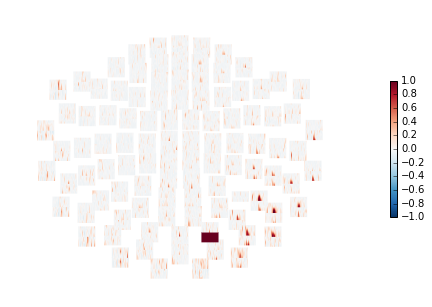

In [59]:
# AverageTFR:Container for Time-Frequency data.
# - https://mne-tools.github.io/stable/generated/mne.time_frequency.AverageTFR.html#mne.time_frequency.AverageTFR
tfr = AverageTFR(epochs.info,con,times,freqs,len(epochs))
tfr.plot_topo(fig_facecolor='w', font_color='k', border='k');

No baseline correction applied


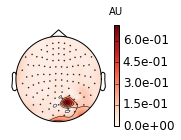

In [60]:
tfr.plot_topomap(tmin=tmin,tmax=tmax,ch_type='grad',mode='zscore');

Applying baseline correction (mode: mean)


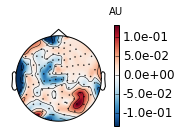

In [61]:
tfr.plot_topomap(tmin=tmin,tmax=tmax,ch_type='grad',mode='mean',baseline=(None,0));

### Ref
- https://mne-tools.github.io/stable/auto_examples/connectivity/plot_cwt_sensor_connectivity.html